In [24]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics




In [25]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


In [26]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

Let's verify above information

In [27]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [28]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [29]:
def show_40_distinct_people(images, unique_ids):
   
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
   
    axarr=axarr.flatten()
    
   
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

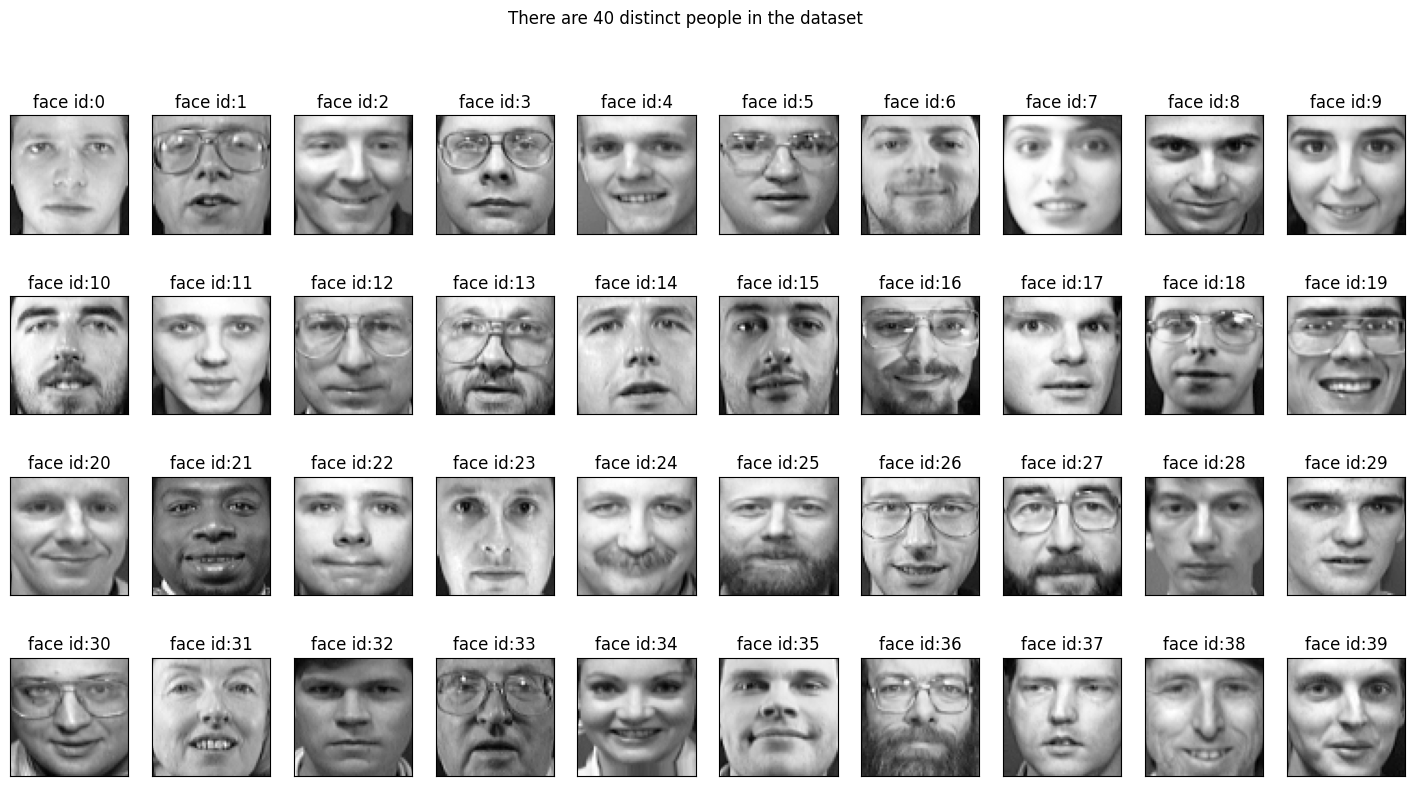

In [30]:
show_40_distinct_people(data, np.unique(target))

In [31]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10
    rows=(len(subject_ids)*10)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
   
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

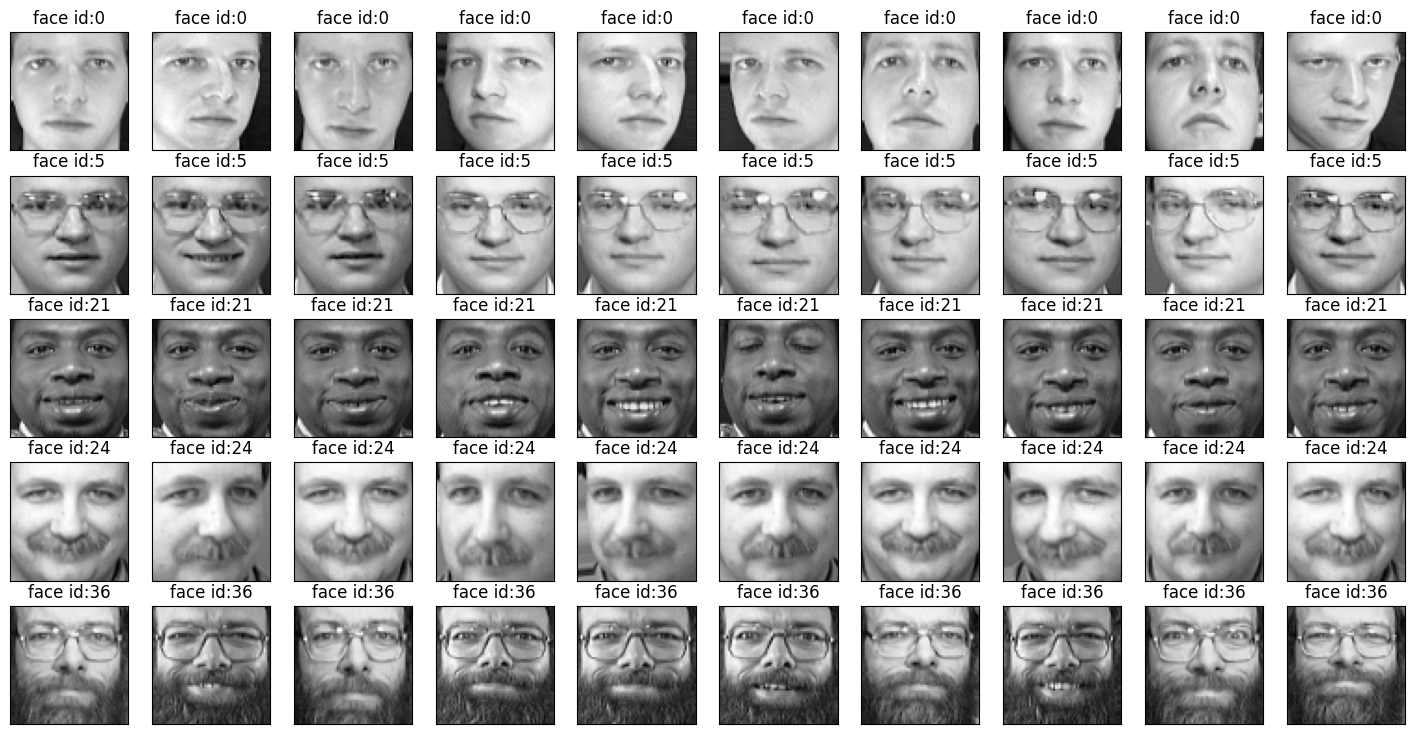

In [32]:

show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [33]:


X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


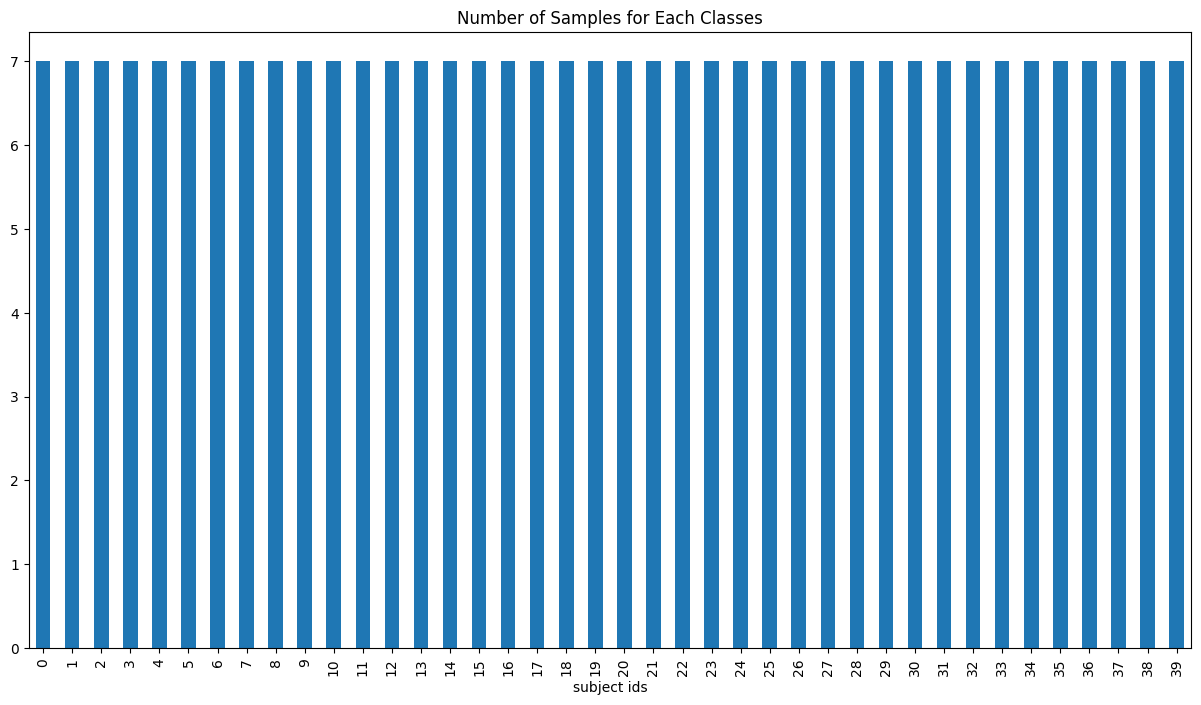

In [35]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
plt.show()

In [36]:
import mglearn

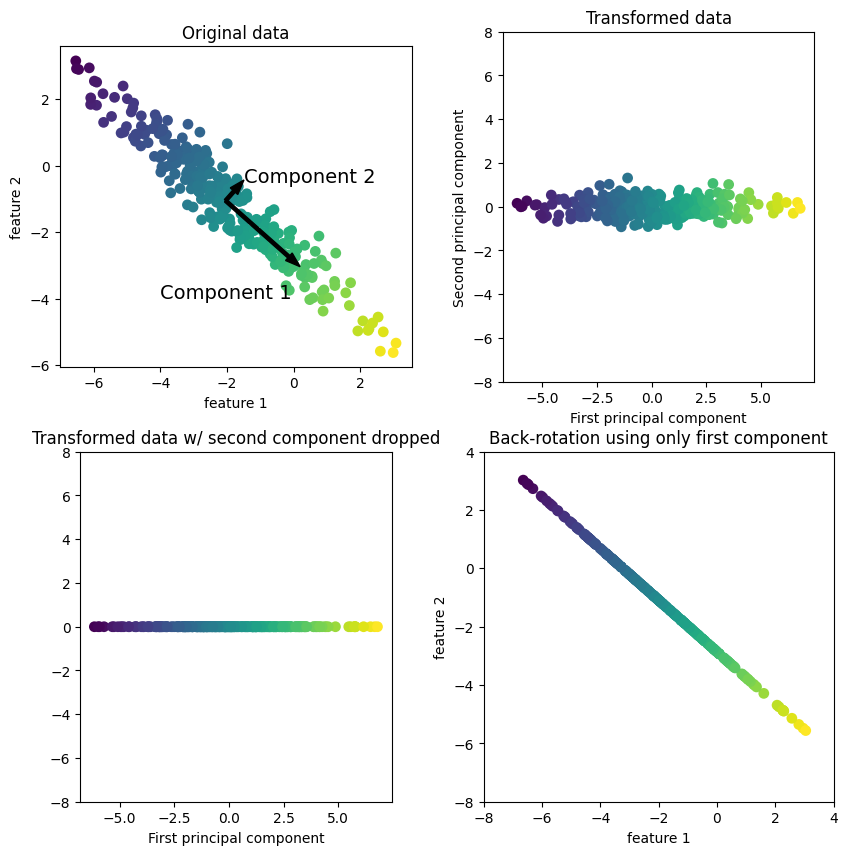

In [37]:
mglearn.plots.plot_pca_illustration()

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

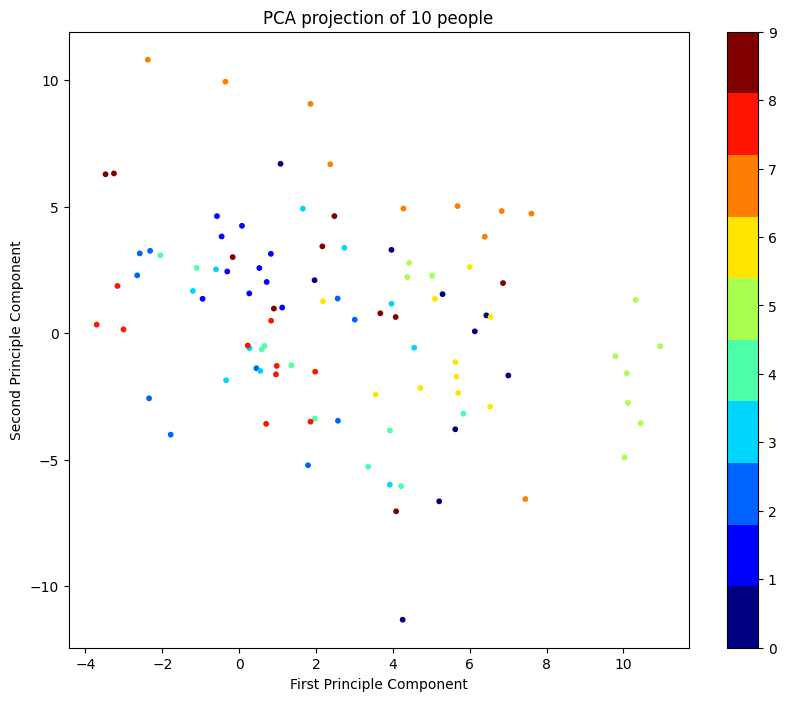

In [39]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [40]:
n_components=90

In [41]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

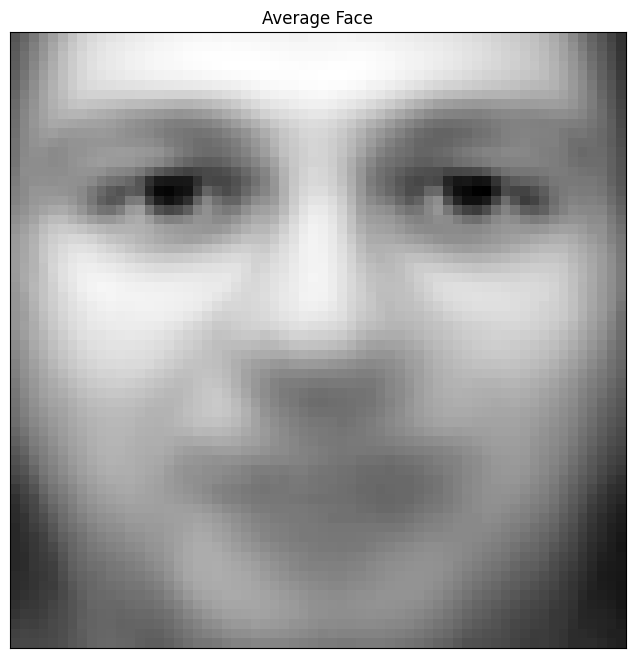

In [42]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

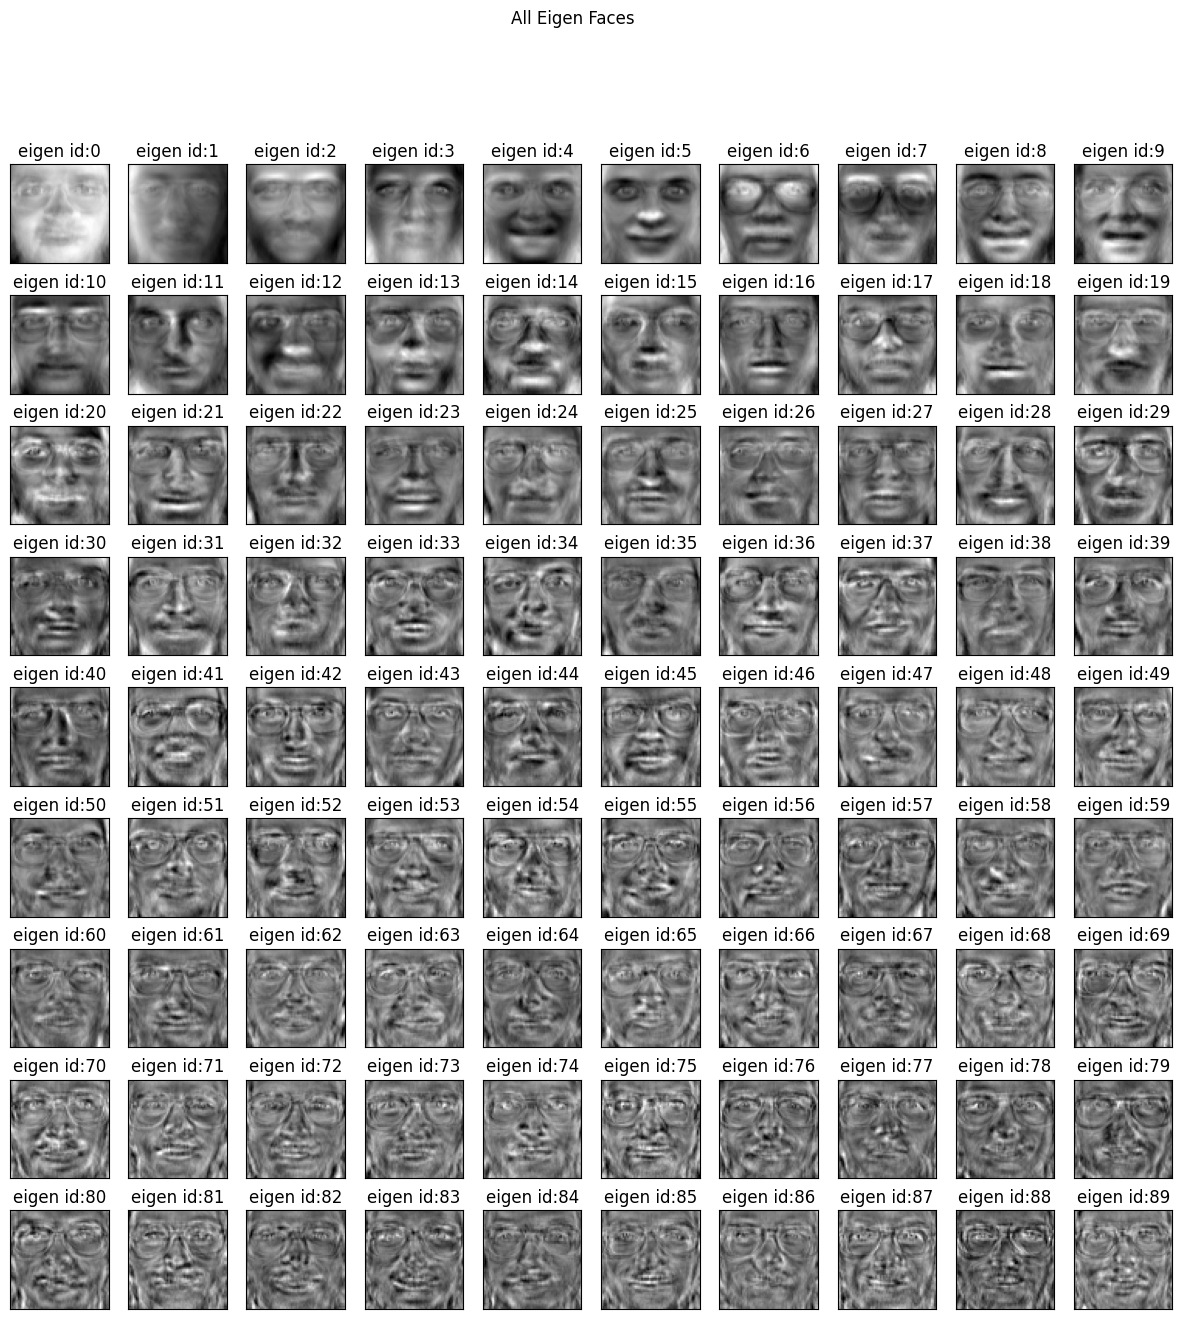

In [43]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))
plt.show()

In [44]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)


from utils import *
ac=[]

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Ensure 'ac' list is defined
if 'ac' not in globals():
	ac = []

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=90))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train_pca, y_train, epochs=3)

# Get predictions
y_pred = (model.predict(X_test_pca) > 0.5).astype("int32")

# Append the accuracy to the list
ac.append(accuracy_score(y_test, y_pred) * 100)


2025-02-11 10:21:43.347470: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 10:21:43.479956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 10:21:45.012213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 10:21:46.257233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739249507.385510    8186 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739249507.64

Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: -30.0130
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: -35.7473 
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: -37.0970 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [53]:
import cv2
pixel=[]
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image_path):
    input_image = cv2.imread(image_path)

    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_roi = input_image[y:y+h, x:x+w]
        pixel.append(cv2.rectangle(input_image, (x, y), (x+w, y+h), (255, 0, 0), 2))
    print(pixel)
    return pixel

from utils import *

pixel_face = detect_faces('/media/manohar/Drive5/4-2 Project')

from sklearn.preprocessing import MinMaxScaler
scaler_transform = MinMaxScaler()
X = scaler_transform.fit_transform(pixel_face)
y = target  # Assuming 'target' is already defined

from sklearn.model_selection import train_test_split

X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X, y, test_size=0.25, random_state=0)





error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from keras import layers
from sklearn.metrics import accuracy_score

# Define the model
model = Sequential()

model.add(layers.Dense(20, input_dim=90, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam')
model.summary()

# Train the model
classifier_nn = model.fit(X_train_pca, y_train_hr,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test_pca, y_test_hr),
                    batch_size=15)

# Append the accuracy to the list
ac.append(accuracy_score(y_test_hr, (model.predict(X_test_pca) > 0.5).astype("int32"))*100)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,415 (71.93 KB)

 Trainable params: 16,367 (63.93 KB)

 Non-trainable params: 2,048 (8.00 KB)

NameError: name 'y_train_hr' is not defined

In [ ]:
print(ac)

[91.72, 96.31]


the accuracy of CNN is 91.72 and LB+Harcascade+CNN is 96.31


,Agorithms,accuracy
0,CNN,91.72
1,LB+Harcascade+CNN,96.31


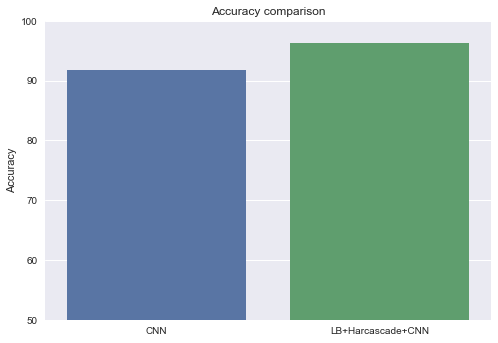

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('seaborn')
x=['CNN','LB+Harcascade+CNN']

ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()